In [2]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.2 MB/s eta 0:00:00


✅ Successfully loaded 'organoid_data_cleaned.csv'
Training data: 120 samples
Testing data: 30 samples

--- Training Model 1: Decision Tree ---
Decision Tree Accuracy: 0.63

--- Training Model 2: Random Forest ---
Random Forest Accuracy: 0.67

--- Training Model 3: XGBoost (Bonus) ---
XGBoost Accuracy: 0.70

--- Performing Hyperparameter Tuning (Bonus) ---
Tuning Random Forest parameters using GridSearchCV...
Best Parameters Found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Model Accuracy: 0.67

--- Final Evaluation (Best Model) ---
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        13
           1       1.00      0.41      0.58        17

    accuracy                           0.67        30
   macro avg       0.78      0.71      0.65        30
weighted avg       0.81      0.67      0.64        30



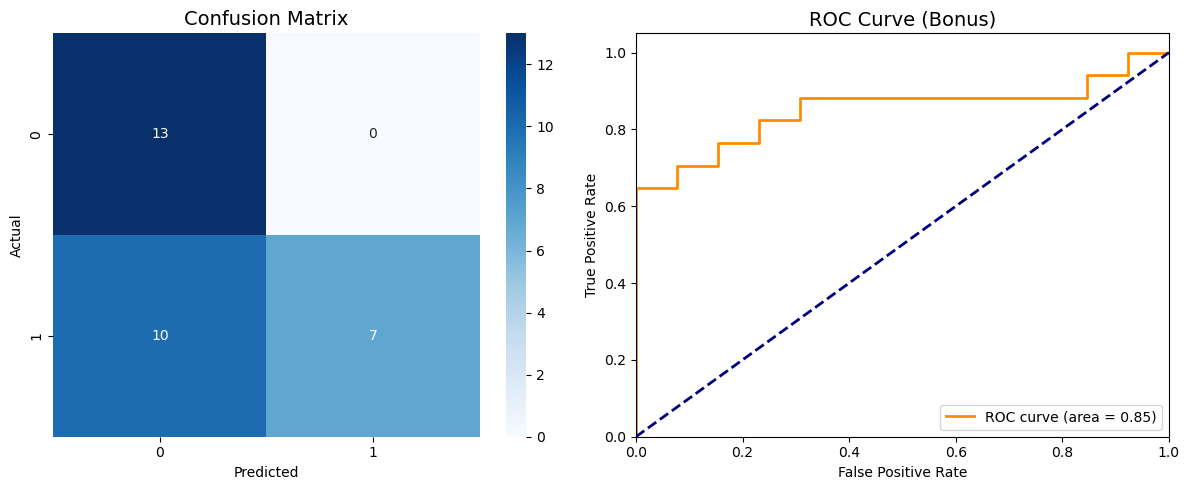


✅ Success! The best tuned model has been saved as 'my_best_model.pkl'


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib 

# Import Models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Bonus: XGBoost

# Import Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# =========================================================
# 1. PREPARE DATA
# =========================================================
try:
    df = pd.read_csv('organoid_data_cleaned.csv')
    print("✅ Successfully loaded 'organoid_data_cleaned.csv'")
except FileNotFoundError:
    print("❌ Error: File not found. Please run the EDA notebook first.")

# X is features, y is target
X = df.drop('Bio_Computer_State', axis=1)
y = df['Bio_Computer_State']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {len(X_train)} samples")
print(f"Testing data: {len(X_test)} samples")


# =========================================================
# 2. TRAIN CORE MODELS
# =========================================================

# Model A: Decision Tree (Baseline)
print("\n--- Training Model 1: Decision Tree ---")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, dt.predict(X_test))
print(f"Decision Tree Accuracy: {dt_acc:.2f}")

# Model B: Random Forest (Standard)
print("\n--- Training Model 2: Random Forest ---")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Random Forest Accuracy: {rf_acc:.2f}")


# =========================================================
# 3. BONUS SECTION (Points: +10)
# =========================================================

# Bonus 1: XGBoost Model (+3 Points)
print("\n--- Training Model 3: XGBoost (Bonus) ---")
# use_label_encoder=False removes warnings, eval_metric='logloss' is standard
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(f"XGBoost Accuracy: {xgb_acc:.2f}")

# Bonus 2: Hyperparameter Tuning (+4 Points)
print("\n--- Performing Hyperparameter Tuning (Bonus) ---")
print("Tuning Random Forest parameters using GridSearchCV...")

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Run Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_
tuned_acc = accuracy_score(y_test, best_model.predict(X_test))

print(f"Best Parameters Found: {grid_search.best_params_}")
print(f"Tuned Model Accuracy: {tuned_acc:.2f}")


# =========================================================
# 4. EVALUATION & VISUALIZATION (Bonus +3 for ROC)
# =========================================================
print("\n--- Final Evaluation (Best Model) ---")
y_pred = best_model.predict(X_test)

# 1. Classification Report (Includes F1-Score)
print(classification_report(y_test, y_pred))

# 2. Confusion Matrix & ROC Curve
plt.figure(figsize=(12, 5))

# Subplot 1: Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Subplot 2: ROC Curve (Bonus Visual)
plt.subplot(1, 2, 2)
y_probs = best_model.predict_proba(X_test)[:, 1] # Probability for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Bonus)', fontsize=14)
plt.legend(loc="lower right")

plt.tight_layout()
plt.show() 


# =========================================================
# 5. SAVE BEST MODEL
# =========================================================
joblib.dump(best_model, 'my_best_model.pkl')
print("\n✅ Success! The best tuned model has been saved as 'my_best_model.pkl'")